#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03B Comparing hotel prices in Europe: Vienna vs. London**

using the hotels-europe dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import mizani
import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/hotels-europe/clean/"
data_out = dirname + "da_case_studies/ch03-hotels-europe-compare/"
output = dirname + "da_case_studies/ch03-hotels-europe-compare/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [6]:
# Import the prewritten helper functions
from py_helper_functions import *

ModuleNotFoundError: No module named 'py_helper_functions'

#### Load in clean and tidy data and create workfile

In [2]:
hotels_europe_price = pd.read_csv("/workspaces/codespaces-jupyter/data/hotels-europe_price.csv")
#hotels_europe_price = pd.read_csv("https://osf.io/download/p6tyr/")
hotels_europe_features = pd.read_csv("/workspaces/codespaces-jupyter/data/hotels-europe_features.csv")
#hotels_europe_features = pd.read_csv("https://osf.io/download/utwjs/")


In [3]:
hotels_europe = pd.merge(
    hotels_europe_price, hotels_europe_features, how="left", on="hotel_id"
)
del hotels_europe_price
del hotels_europe_features

#### Filter for same Vienna data we used + London same date

In [4]:
hotels_europe_cut = hotels_europe.loc[
    (hotels_europe["year"] == 2017)
    & (hotels_europe["month"] == 11)
    & (hotels_europe["weekend"] == 0)
    & (hotels_europe["city"].isin(["Vienna", "London"]))
    & (hotels_europe["accommodation_type"] == "Hotel")
    & (hotels_europe["stars"] >= 3)
    & (hotels_europe["stars"] <= 4)
    & (hotels_europe["stars"].notna())
    & (hotels_europe["city_actual"].isin(["Vienna", "London"]))
    & (hotels_europe["price"] <= 600)
]

In [5]:
hotels_europe_cut.price.max()

np.int64(491)

In [7]:
max_price_city = hotels_europe_cut.loc[hotels_europe_cut['price'] == hotels_europe_cut['price'].max(), 'city']
print(max_price_city)

53900    London
Name: city, dtype: object


In [8]:
import numpy as np

# Find the maximum price
max_price = np.max(hotels_europe_cut['price'])

# Find the city corresponding to the maximum price
max_price_city = hotels_europe_cut.loc[hotels_europe_cut['price'] == max_price, 'city']
print(max_price_city)

53900    London
Name: city, dtype: object


In [8]:
hotels_europe_cut.groupby("city").agg(
    mean_price=("price", "mean"), max=("price", "max"), n=("price", "size")
)

,mean_price,max,n
city,,,
London,202.356322,491,435
Vienna,109.975845,383,207


In [10]:
hotels_europe_cut.columns

Index(['hotel_id', 'price', 'offer', 'offer_cat', 'year', 'month', 'weekend',
       'holiday', 'nnights', 'scarce_room', 'city', 'distance', 'stars',
       'rating', 'country', 'city_actual', 'rating_reviewcount',
       'center1label', 'center2label', 'neighbourhood', 'ratingta',
       'ratingta_count', 'distance_alter', 'accommodation_type'],
      dtype='object')

In [12]:

vienna_subset = hotels_europe_cut[hotels_europe_cut['city'] == 'Vienna']
london_subset = hotels_europe_cut[hotels_europe_cut['city'] == 'London']

vienna_subset

,hotel_id,price,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room,...,country,city_actual,rating_reviewcount,center1label,center2label,neighbourhood,ratingta,ratingta_count,distance_alter,accommodation_type
140450,21897,81,1,1-15% offer,2017,11,0,0,1,0,...,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,3.5,708.0,3.8,Hotel
140472,21901,85,1,15-50% offer,2017,11,0,0,1,0,...,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,3.5,629.0,2.5,Hotel
140482,21902,83,1,15-50% offer,2017,11,0,0,1,0,...,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,4.0,52.0,2.5,Hotel
140492,21903,82,1,15-50% offer,2017,11,0,0,1,1,...,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,3.5,219.0,2.8,Hotel
140505,21906,103,0,0% no offer,2017,11,0,0,1,1,...,Austria,Vienna,57.0,City centre,Donauturm,Alsergrund,3.5,251.0,2.4,Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144038,22401,100,1,1-15% offer,2017,11,0,0,1,1,...,Austria,Vienna,77.0,City centre,Donauturm,Wieden,4.0,149.0,3.7,Hotel
144047,22402,95,1,1-15% offer,2017,11,0,0,1,1,...,Austria,Vienna,572.0,City centre,Donauturm,Wieden,4.0,1003.0,3.9,Hotel
144052,22403,73,1,1-15% offer,2017,11,0,0,1,1,...,Austria,Vienna,53.0,City centre,Donauturm,Wieden,3.0,293.0,4.0,Hotel
144085,22407,100,0,0% no offer,2017,11,0,0,1,1,...,Austria,Vienna,112.0,City centre,Donauturm,Wieden,4.5,1006.0,3.7,Hotel


In [13]:

london_subset

,hotel_id,price,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room,...,country,city_actual,rating_reviewcount,center1label,center2label,neighbourhood,ratingta,ratingta_count,distance_alter,accommodation_type
51691,7164,131,0,0% no offer,2017,11,0,0,1,0,...,United Kingdom,London,161.0,City centre,Wimbledon Park Underground Station,Blackheath,4.0,1669.0,9.3,Hotel
51720,7169,253,1,50%-75% offer,2017,11,0,0,1,1,...,United Kingdom,London,557.0,City centre,Wimbledon Park Underground Station,Bloomsbury,4.0,1019.0,6.5,Hotel
51721,7170,160,1,1-15% offer,2017,11,0,0,1,0,...,United Kingdom,London,201.0,City centre,Wimbledon Park Underground Station,Bloomsbury,2.5,507.0,6.5,Hotel
51738,7171,223,1,15-50% offer,2017,11,0,0,1,0,...,United Kingdom,London,107.0,City centre,Wimbledon Park Underground Station,Bloomsbury,4.0,1070.0,6.8,Hotel
51744,7172,241,1,15-50% offer,2017,11,0,0,1,1,...,United Kingdom,London,361.0,City centre,Wimbledon Park Underground Station,Bloomsbury,4.0,359.0,6.6,Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61278,8551,401,1,15-50% offer,2017,11,0,0,1,0,...,United Kingdom,London,626.0,City centre,Wimbledon Park Underground Station,West End,5.0,3946.0,6.0,Hotel
61295,8553,299,1,15-50% offer,2017,11,0,0,1,0,...,United Kingdom,London,371.0,City centre,Wimbledon Park Underground Station,West End,4.5,1586.0,5.9,Hotel
61309,8555,146,1,15-50% offer,2017,11,0,0,1,1,...,United Kingdom,London,61.0,City centre,Wimbledon Park Underground Station,White City,4.0,153.0,5.0,Hotel
61337,8559,120,1,1-15% offer,2017,11,0,0,1,0,...,United Kingdom,London,57.0,City centre,Wimbledon Park Underground Station,White City,3.5,357.0,4.9,Hotel


### Figure 3.6 The distribution of hotel price in Vienna and London

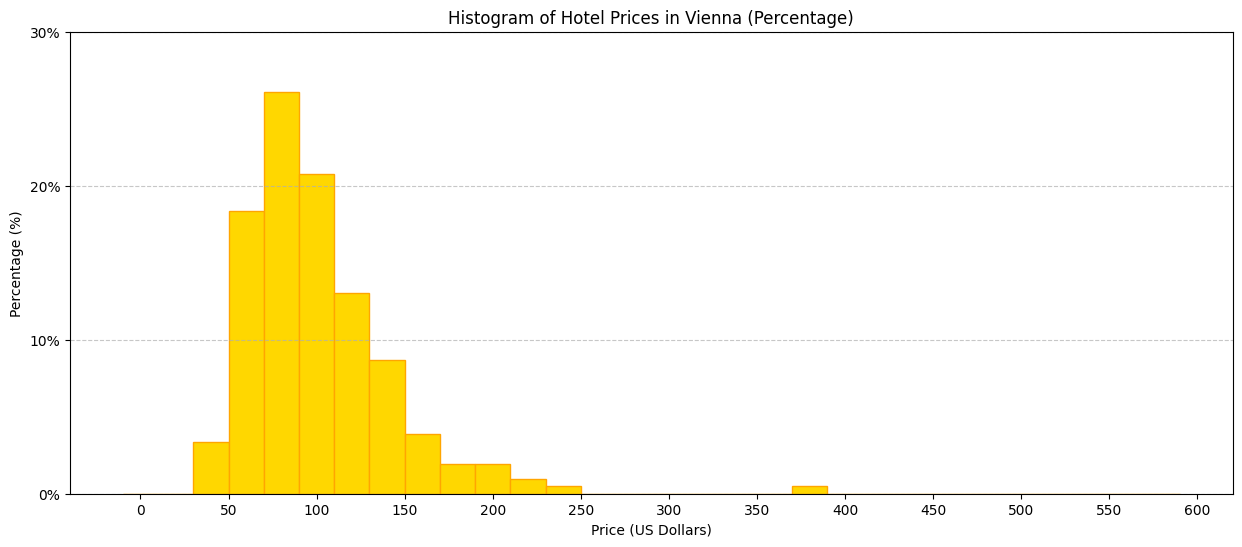

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate normalized frequencies (percentages)
data = vienna_subset['price']
bin_edges = np.arange(0, 601, 20)
hist, bins = np.histogram(data, bins=bin_edges)
percentages = hist / hist.sum() * 100

# Plot histogram
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(bin_edges[:-1], percentages, width=20, color="gold", edgecolor="orange")

# Formatting
ax.set_xlabel("Price (US Dollars)")
ax.set_ylabel("Percentage (%)")  # Update y-axis label to show percentage
ax.set_title("Histogram of Hotel Prices in Vienna (Percentage)")
ax.set_xticks(np.arange(0, 601, 50))  # Set x-axis ticks
ax.set_yticks(np.arange(0, percentages.max() + 10, 10))  # Set y-axis ticks
ax.set_yticklabels([f"{int(y)}%" for y in ax.get_yticks()])  # Add % to y-axis labels
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

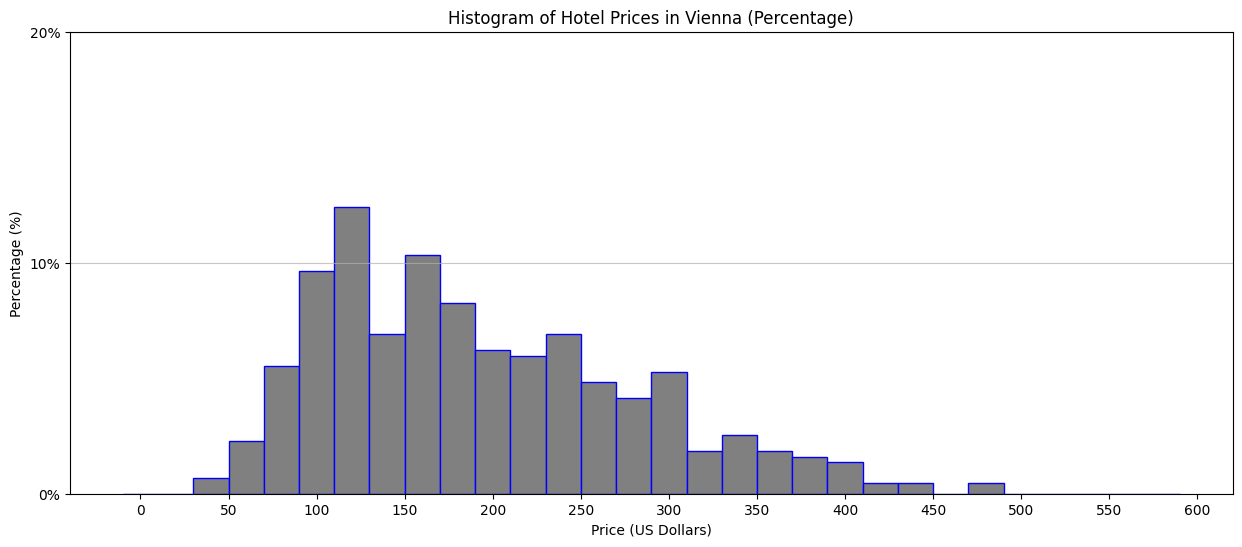

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate normalized frequencies (percentages)
data = london_subset['price']
bin_edges = np.arange(0, 601, 20)
hist, bins = np.histogram(data, bins=bin_edges)
percentages = hist / hist.sum() * 100

# Plot histogram
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(bin_edges[:-1], percentages, width=20, color="grey", edgecolor="blue")

# Formatting
ax.set_xlabel("Price (US Dollars)")
ax.set_ylabel("Percentage (%)")  # Update y-axis label to show percentage
ax.set_title("Histogram of Hotel Prices in Vienna (Percentage)")
ax.set_xticks(np.arange(0, 601, 50))  # Set x-axis ticks
ax.set_yticks(np.arange(0, percentages.max() + 10, 10))  # Set y-axis ticks
ax.set_yticklabels([f"{int(y)}%" for y in ax.get_yticks()])  # Add % to y-axis labels
ax.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

### Figure 3.7 Density plots of hotel prices: Vienna and London

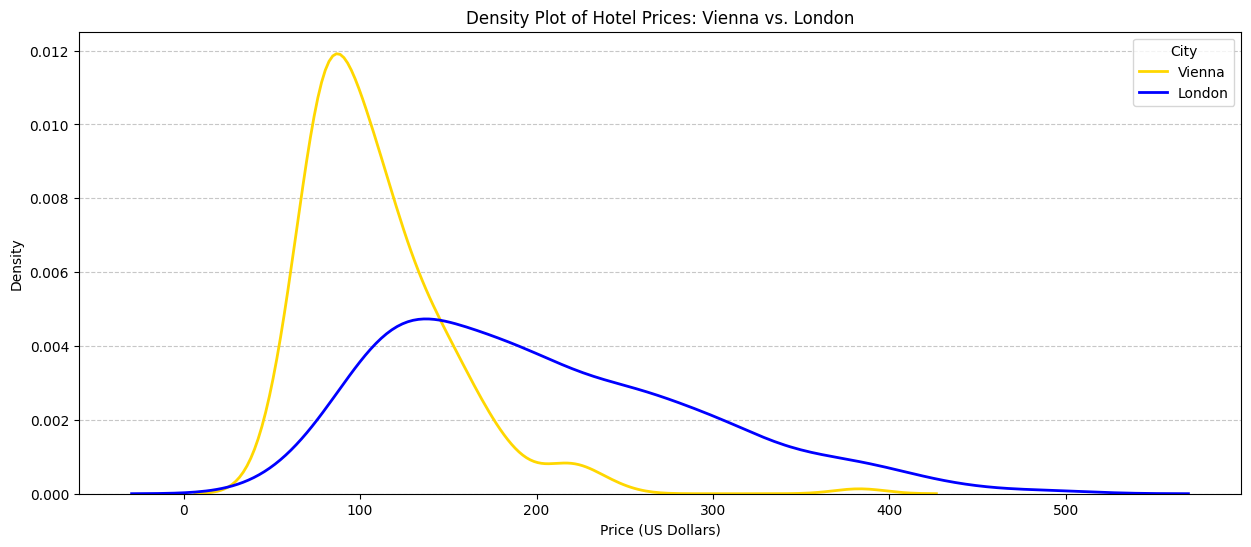

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot density plots for Vienna and London
plt.figure(figsize=(15, 6))
sns.kdeplot(data=vienna_subset['price'], label="Vienna", color="gold", linewidth=2)
sns.kdeplot(data=london_subset['price'], label="London", color="blue", linewidth=2)

# Formatting
plt.xlabel("Price (US Dollars)")
plt.ylabel("Density")
plt.title("Density Plot of Hotel Prices: Vienna vs. London")
plt.legend(title="City")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [46]:
vienna_subset['price'].mean()
print(vienna_subset['price'].std())

42.221381370006355


#### Table 3.6

In [37]:
# Descriptive statistics for Vienna
vienna_stats = vienna_subset['price'].describe()
vienna_stats

count    207.000000
mean     109.975845
std       42.221381
min       50.000000
25%       82.000000
50%      100.000000
75%      129.500000
max      383.000000
Name: price, dtype: float64

In [38]:
# Descriptive statistics for London
london_stats = london_subset['price'].describe()
london_stats

count    435.000000
mean     202.356322
std       88.128830
min       49.000000
25%      129.000000
50%      186.000000
75%      258.000000
max      491.000000
Name: price, dtype: float64

In [47]:
# Descriptive statistics for Vienna
vienna_stats = vienna_subset['price'].agg(['mean', 'median', 'std', 'min', 'max'])
print("Descriptive Statistics for Vienna:")
print(vienna_stats)

# Descriptive statistics for London
london_stats = london_subset['price'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nDescriptive Statistics for London:")
print(london_stats)

Descriptive Statistics for Vienna:
mean      109.975845
median    100.000000
std        42.221381
min        50.000000
max       383.000000
Name: price, dtype: float64

Descriptive Statistics for London:
mean      202.356322
median    186.000000
std        88.128830
min        49.000000
max       491.000000
Name: price, dtype: float64
